# Introductory analysis of airQ data

### Necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### Loading the data

In [3]:
data_set = pd.read_csv('/home/alicja/Documents/airq_data.csv')
data_set.head()

id  id_station                 date  soft_ver  id_conf    d1    d2  d3  \
0  362884           2  2018-05-06 19:50:06         1        1  21.3  39.3   5   
1  362885           3  2018-05-06 19:49:55         1        1  18.1  99.9  28   
2  362886           2  2018-05-06 19:50:59         1        1  21.3  39.4   5   
3  362887           3  2018-05-06 19:50:50         1        1  17.9  99.9  28   
4  362888           2  2018-05-06 19:51:26         1        1  21.3  39.4   5   

   d4  
0   6  
1  34  
2   6  
3  34  
4   5

### Renaming columns

In [5]:
data_set.rename(columns={'d1':'temperature'}, inplace=True)
data_set.rename(columns={'d2':'humidity'}, inplace=True)
data_set.rename(columns={'d3':'PM 2.5'}, inplace=True)
data_set.rename(columns={'d4':'PM 10'}, inplace=True)

### Basic statistics 

In [6]:
data_set.describe()

id    id_station  soft_ver  id_conf   temperature  \
count   10000.00000  10000.000000   10000.0  10000.0  10000.000000   
mean   367883.50000      2.225500       1.0      1.0     19.260650   
std      2886.89568      0.726982       0.0      0.0      3.914705   
min    362884.00000      1.000000       1.0      1.0     -1.000000   
25%    365383.75000      2.000000       1.0      1.0     15.700000   
50%    367883.50000      2.000000       1.0      1.0     21.100000   
75%    370383.25000      3.000000       1.0      1.0     22.200000   
max    372883.00000      4.000000       1.0      1.0     26.200000   

           humidity        PM 2.5         PM 10  
count  10000.000000  10000.000000  10000.000000  
mean      59.691650     10.094300     10.822400  
std       23.510354     12.265091     14.566835  
min       -1.000000      0.000000      0.000000  
25%       41.800000      5.000000      5.000000  
50%       46.500000      8.000000      8.000000  
75%       82.525000     13.000000     14.000000  
max       99.900000    648.000000    788.000000

### Correlation of the data

In [56]:
data_set.corr()

id  id_station  soft_ver  id_conf  temperature  humidity  \
id           1.000000   -0.190833       NaN      NaN    -0.343257  0.509727   
id_station  -0.190833    1.000000       NaN      NaN    -0.175471 -0.101808   
soft_ver          NaN         NaN       NaN      NaN          NaN       NaN   
id_conf           NaN         NaN       NaN      NaN          NaN       NaN   
temperature -0.343257   -0.175471       NaN      NaN     1.000000 -0.812195   
humidity     0.509727   -0.101808       NaN      NaN    -0.812195  1.000000   
PM 2.5       0.077733    0.164659       NaN      NaN    -0.425940  0.392777   
PM 10        0.044232    0.162885       NaN      NaN    -0.406970  0.378319   

               PM 2.5     PM 10  
id           0.077733  0.044232  
id_station   0.164659  0.162885  
soft_ver          NaN       NaN  
id_conf           NaN       NaN  
temperature -0.425940 -0.406970  
humidity     0.392777  0.378319  
PM 2.5       1.000000  0.996921  
PM 10        0.996921  1.000000

### Checking if there are any missing values

In [12]:
data_set.isnull().values.any()

False

### Creating the variables

In [15]:
t = data_set['temperature']
h = data_set['humidity']
pm10 = data_set['PM 10']
pm2 = data_set['PM 2.5']

### Showing the correlation between temperature, humidity and the PM 10

In [13]:
data_set['temperature'].corr(data_set['PM 10'])

-0.40696962521589075

In [14]:
data_set['humidity'].corr(data_set['PM 10'])

0.37831879122511697

In [41]:
data_set['humidity'].corr(data_set['temperature'])

-0.8121951568659472

In [43]:
data_set['PM 2.5'].corr(data_set['PM 10'])

0.9969205127109767

### Plotting temperature against PM 10

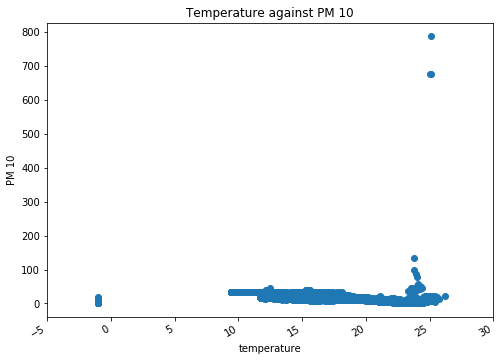

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-5, 30)

plt.title('Temperature against PM 10')
plt.xlabel('temperature')
plt.ylabel('PM 10')

ax.plot(t,pm10,'o')
plt.gcf().autofmt_xdate()

### Plotting humidity against PM 10

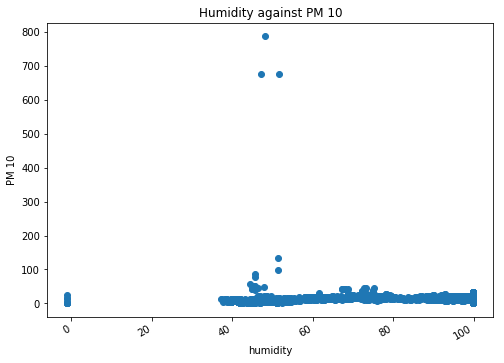

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

plt.title('Humidity against PM 10')
plt.xlabel('humidity')
plt.ylabel('PM 10')

ax.plot(h,PM10,'o')
plt.gcf().autofmt_xdate()

### Plotting humidity against temperature

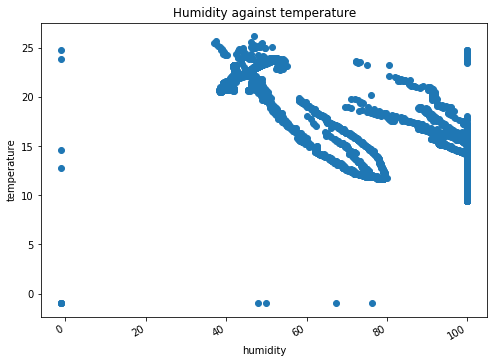

In [46]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

plt.title('Humidity against temperature')
plt.xlabel('humidity')
plt.ylabel('temperature')

ax.plot(h,t,'o')
plt.gcf().autofmt_xdate()

### Plotting specific region of the data temperature (PM10 in 0:150 range)

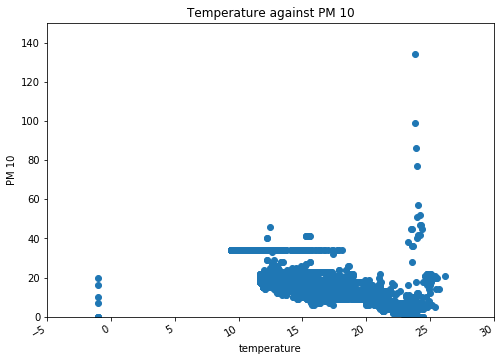

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-5, 30)
ax.set_ylim(0, 150)

plt.title('Temperature against PM 10')
plt.xlabel('temperature')
plt.ylabel('PM 10')

ax.plot(t,pm10,'o')
plt.gcf().autofmt_xdate()

### Plotting specific region of the data humidity (PM10 in 0:150 range)

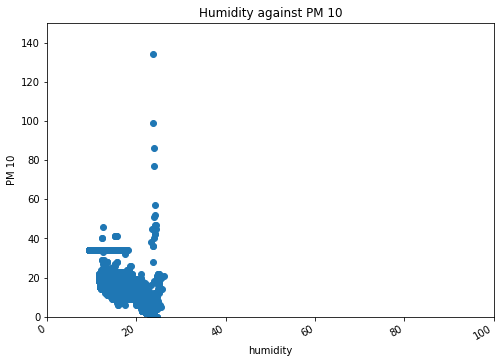

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0, 100)
ax.set_ylim(0, 150)

plt.title('Humidity against PM 10')
plt.xlabel('humidity')
plt.ylabel('PM 10')

ax.plot(t,pm10,'o')
plt.gcf().autofmt_xdate()    

### Boxplot of the PM 10 data

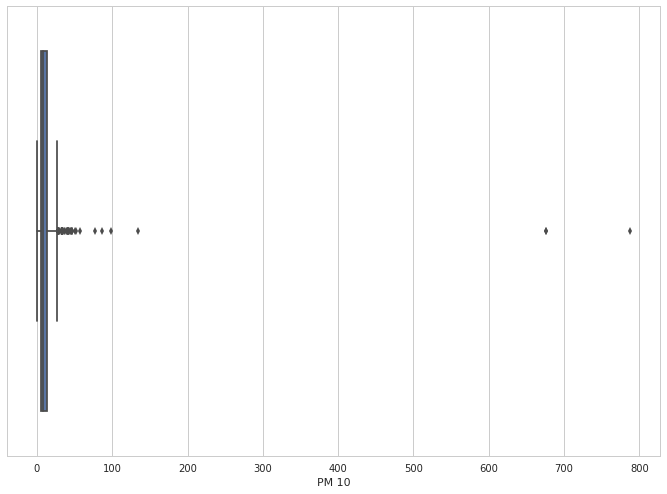

In [52]:
sns.set(style="whitegrid")
box = data_set
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x=box["PM 10"])

### Boxplot of the temperature

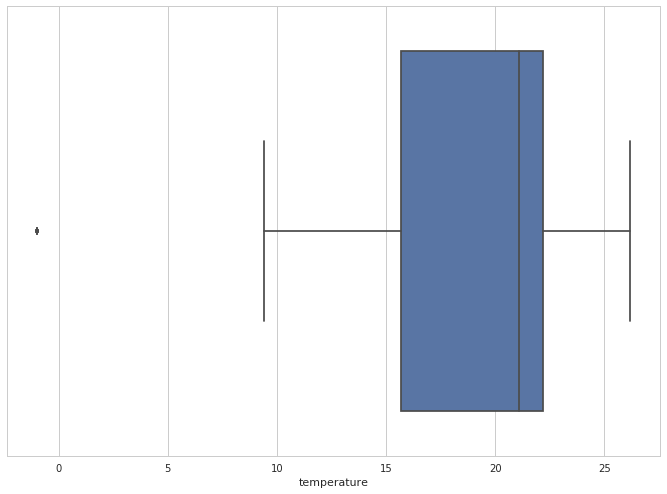

In [53]:
sns.set(style="whitegrid")
box = data_set
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x=box["temperature"])

### Boxplot of the humidity

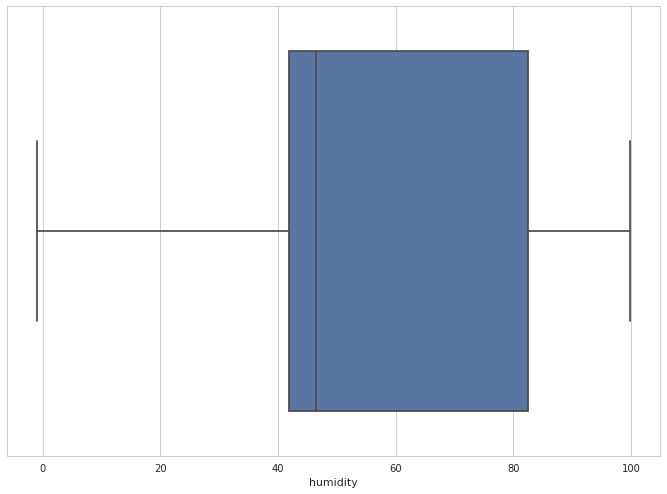

In [54]:
sns.set(style="whitegrid")
box = data_set
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x=box["humidity"])